# Identification of nonlinear systems


## Nonlinear estimation problem

Given a set of training data $\{(x_i, y_i)\}_{i\in I}$ with $x_i\in X$ and $y_i\in \mathbb{R}$, we seek to determine a function $g:X\to \mathbb{R}$ to "best" interpolate these data according to the model 

$$
y = g(x).
$$

We will focus on functions in certain functional spaces. We shall, in particular, restrict our attention to a Hibert space $H$.

Our objective is to solve the following regularized least-squares problem over $H$ with a regularizer $R:H\to\mathbb{R}$ and regularization parameter $\gamma>0$

$$
\operatorname*{Minimize}_{g\in H} \sum_{i\in I} (y_i - g(x_i))^2 + \gamma R(g)
$$

A solution (minimizer) of this problem (when there exists one) is denoted by $g^\star$.

Good news: although this problem looks too abstract (the minimization is carried out over an abstract space $H$), it is possible to derive a closed-form solution for $g$ provided we endow $H$ with a certain structure. This is the structure of a reproducing kernel Hilbert space.

## Reproducing kernel Hilbert spaces

#### RKHS definition

A [reproducing kernel Hilbert space](https://en.wikipedia.org/wiki/Reproducing_kernel_Hilbert_space) (RKHS) is a Hilbert space $H$ of real-valued function over a nonempty set $X$ in which pointwise evaluation, defined as
$$
L_x(f) = f(x),\ (\forall f\in H),
$$
is a continuous mapping.

RHKS are fully characterised by a *positive semidefinite kernel* which is a symmetric mapping $K:X\times X\to\mathbb{R}$ such that
$$
\sum_{i,j=1}^{n}c_i c_j X(x_i, x_j) \geq 0,
$$
for all $p\in\mathbb{N}$, $c_1,\ldots, c_n\in\mathbb{R}$.

#### Moore-Aronszajn Theorem

According to the [Moore-Aronszajn Theorem](https://en.wikipedia.org/wiki/Reproducing_kernel_Hilbert_space#Moore%E2%80%93Aronszajn_theorem), RHKS are characterised by a positive semidefinite kernel and, conversely, positive semidefinite kernels induce RKHS.

To every RKHS $H$ corresponds a *unique* positive semidefinite kernel $K$ called the **reproducing kernel** which is such that
$$
g(x) = \langle g, K_x \rangle,\ (\forall x \in X)(\forall g \in H)
$$
Conversely, to a positive semidefinite kernel $K$ corresponds a unique induced RKHS whose reproducing kernel is $K$.

#### The norm of an RKHS

Let $K$ be a kernel and $H$ the corresponding RKHS. 

The following functions are in $H$:

$$
g(x) = \sum_{i=1}^{p} a_i K(x_i, x),
$$

for some $a_i$ and $x_i$, $i=1,\ldots,p$.

The norm of $g$ is 

$$
\|g\|_{H} = \sum_{i,j=1}^{p} a_i a_j K(x_i, x_j).
$$


#### The Gram matrix

Last step before we state a result of central importance in system identification, functional analysis and learning theory at large.

Let $Y = (y_i)_{i}\in\mathbb{R}^N$ be the obtained measurements and $x_i$ be the corresponding state vectors (typically past values of $y$ and $u$). 

The **Gram matrix** or **kernel matrix** is the matrix $K\in\mathbb{R}^{N\times N}$ defined as 
$$
K = (K(x_i, x_j))_{i,j} 
$$

#### Representer theorem

Consider the identification problem:


$$
\mathbb{P}: \operatorname*{Minimize}_{g\in H} \sum_{i\in I} (y_i - g(x_i))^2 + \gamma \|g\|_H,
$$


where $\|{}\cdot{}\|_H$ is the norm of a RKHS $H$.

According to the [representer theorem](https://en.wikipedia.org/wiki/Representer_theorem), this problem has an **explicit solution** which is 

$$
g^\star(x) {}={} \sum_{i=1}^{N} c_i^\star K(x_i, x)
$$

with $c^\star = (c_i^\star)_i$ given by

$$
c^\star = (K + \gamma I_N)^{-1}Y,
$$


where $I_N$ is the $N\times N$ identity matrix.

## Kernels

Let us have a look at a few examples of kerners:

#### Linear kernel

Let $P\in\mathbb{R}^{n\times n}$ be a symmetric positive semidefinite matrix and define

$$
K(x_1, x_2) = x_1'Px_2.
$$

According to the Moore-Aronszajn Theorem, the RHKS which is induced by this kernel is that of linear functions 

$$
g(x) = K_{c}(x) = c'Px.
$$

If $P$ is full rank, then the RKHS is the space of all function $g(x) = \theta' x$ with $\theta\in\mathbb{R}^n$ and the norm on that space is 

$$
\|g\|_H = \theta' P^{-1} \theta.
$$


#### Gaussian kernel

The [Gaussian kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) is the parametric kernel

$$
K(x_1, x_2) = \exp \left( -\rho \|x_1 - x_2\|^2 \right),
$$

with $\rho>0$.

#### Exponential kernel

The exponential kernel is very similar to the Gaussian kernel

$$
K(x_1, x_2) = \exp \left( -\rho \|x_1 - x_2\| \right),
$$

with $\rho>0$. 

The only difference is that there is the norm $\|{}\cdot{}\|$ in lieu of the squared norm.

#### Sigmoid kernel

The sigmoid kernel is also known as the multilayer perceptron kernel. It is very popular in machine learning and, in particular, in SVM. It is defined as

$$
K(x_1, x_2) = \tanh (a x_1' x_2 + b).
$$

In [1]:
# Necessary imports
import numpy as np
import scipy as sp
import cvxpy as cp
import matplotlib.pyplot as plt

## Kernel methods for identification in action

Let us give a simple nonlinear regression example.

Given a collection of data $\{(x_i, y_i)\}_{i=1}^{N}$ with $x_i\in\mathbb{R}^n$ and $y_i\in\mathbb{R}$, we aim at determining a function $g$ which solves $\mathbb{P}$.

In [2]:
# KERNELS

class kernel:
    
    def __init__(self):
        pass
    
    def call(self, x, y):
        pass

    
class gaussian_kernel(kernel):
    
    def __init__(self, rho):
        super().__init__()
        self._rho = rho
        
    def call(self, x, y):
        r = np.exp( -self._rho* np.linalg.norm(x-y)**2 )
        return r
    
class exponential_kernel(kernel):
    
    def __init__(self, rho):
        super().__init__()
        self._rho = rho
        
    def call(self, x, y):
        r = np.exp( -self._rho* np.linalg.norm(x-y) )
        return r

class sigmoid_kernel(kernel):
    
    def __init__(self, a, b):
        super().__init__()
        self._a = a
        self._b = b
        
    def call(self, x, y):
        r = np.tanh(self._a * np.dot(x,y) + self._b)
        return r    
    
# Example of use of a kernel:
sig_kernel = sigmoid_kernel(0.5,0.1)   
kxy = sig_kernel.call(np.array([1,2]),np.array([4,3]))

### Exercise 1

The **cubic spline kernel** is a function $K:\mathbb{R}^n\times\mathbb{R}^n\to\mathbb{R}$ given by

$$
            K(x, y) 
{}={}
            \prod_{i=1}^{n}
                1 
                +
                x_i y_i
                +
                x_i y_i \min\{x_i, y_i\}
                -
                \frac{x_i + y_i}{2} \min\{x_i, y_i\}^2
                +
                \frac{\min\{x_i, y_i\}^3}{3}
$$

Implement the cubic spline kernel...

In [ ]:
# EXERCISE 1 - CODE
class cubic_spline_kernel(kernel):
    
    def __init__(self):
        super().__init__()
        
    def call(self, x, y):
        # YOUR CODE GOES HERE
        return 0
    
# Test your code
x = np.array([0.2, 0.5, 0.3])
y = np.array([0.3, 0.1, -0.1])
correct_cubic_spline_value = 1.08864
cub_spli_krnl = cubic_spline_kernel()
cub_spli_value = cub_spli_krnl.call(x,y)

# This will fail until you complete the implementation above
assert((np.abs(correct_cubic_spline_value - cub_spli_value) < 1e-5)), "wrong value"

In [71]:
class rkhs_function:
    
    def __init__(self, X, c, krnl):
        if not isinstance(krnl, kernel):
            raise TypeError
        self._X = X
        shape_X = np.shape(X)
        self._num_data = shape_X[0]
        self._dim_data = shape_X[1]
        self._krnl = krnl
        self._c = c
        pass
    
    def _call(self, x):
        gx = 0.
        for i in range(0, self._num_data):
            gx += self._c[i] * self._krnl.call(self._X[i], x)
        return gx
    
    def call(self,x):   
        shape_x = np.shape(x)
        if (x.ndim == 1):
            gx = self._call(x)
        else:
            n_data_points = shape_x[0]
            gx = np.zeros(n_data_points)
            for k in range(0, n_data_points):
                gx[k] = self._call(x[k])
        return gx
            

# Example of use    
X = np.array([[1,2,5],[3,4,-1]])                 # data (centers of kernel functions)
c = np.array([0.1, 0.2])                         # coefficients
gauss_krnl = gaussian_kernel(0.5)                # choose a kernel
g_function = rkhs_function(X, c, gauss_krnl)     # create a function in the RHKS
gx1 = g_function.call(np.array([[1,1.9,4]]))
gx2 = g_function.call(np.array([[1,1.9,4], [1,2,3]]))        # use the function (on multiple vectors)


In [227]:
# We now define the class `trainer` which will facilitate the training procedure
class trainer:
    
    def __init__(self, krnl, gamma_regularizer):
        self._krnl = krnl
        self._gamma_regularizer = gamma_regularizer
        pass
    
    
    def _construct_gram_matrix(self, x_data):
        # Construct the Gram matrix
        shape_data = np.shape(x_data)
        n_data = shape_data[0]
        gram_matrix = np.zeros([n_data, n_data])    
        for i in range(0, n_data):
            for j in range(0, n_data):
                gram_matrix[i,j] = self._krnl.call(x_data[i], x_data[j])
        return gram_matrix
    
    def train(self, x_data, y_data):
        shape_data = np.shape(x_data)
        n_data = shape_data[0]
        gram_matrix = self._construct_gram_matrix(x_data)
        # Solve the least squares problem using the representer theorem   
        c_star = np.linalg.solve(                                     \
                     self._gamma_regularizer * np.identity(n_data)    \
                      + gram_matrix, y_data)
        g_star = rkhs_function(x_data, c_star, self._krnl)
        return g_star

In [301]:
# Construct some training data
n_training_data = 300
dim_x_data = 2
model_noise = 0.05

def hidden_function(x):
    return np.sin(0.4*x[0]) + np.sin(0.6*x[1])*x[0]*x[1] +  3*x[0]*(1-x[0]) +         \
             np.random.normal(0, model_noise, 1)

x_training_data  = np.zeros([n_training_data, dim_x_data])
y_training_data  = np.zeros([n_training_data, 1])
for i in range(0, n_training_data):
    x_training_data[i,0] = np.sin(0.2*i**1.3 + 1.)
    x_training_data[i,1] = np.sin(0.4*(i**1.2) + .5)
    y_training_data[i] = hidden_function(x_training_data[i]) 

# Choose a kernel
rho_gaussian = 0.5
gamma_reg = 0.05
krnl = gaussian_kernel(rho_gaussian)
trn = trainer(krnl, gamma_reg)
g_star = trn.train(x_training_data, y_training_data)


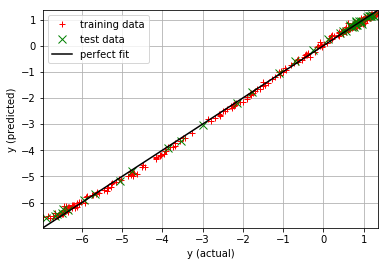

0.099671259834248446

In [302]:
# Validate against the training dataset
y_training_data_predicted = g_star.call(x_training_data)
    
# Create some arbitrary test data
def create_test_data(n_test_data):
    x_test_data  = np.zeros([n_test_data, dim_x_data])
    y_test_data  = np.zeros(n_test_data)
    y_test_data_predicted  = np.zeros(n_test_data)
    for i in range(0, n_test_data):
        x_test_data[i,0] = np.sin(0.1*i + 1.)
        x_test_data[i,1] = np.sin(2*(i**2) + 1.5)
        y_test_data[i] = hidden_function(x_test_data[i])
    return x_test_data, y_test_data

n_test_points = 40
x_test_data, y_test_data = create_test_data(n_test_points)
y_test_data_predicted = g_star.call(x_test_data)
    
# Plot actual-vs-predicted    
plt.plot(y_training_data, y_training_data_predicted, marker='+', color='r', markersize=6, linestyle='None')
plt.plot(y_test_data, y_test_data_predicted, marker='x', color='g', markersize=8, linestyle='None')
miny = np.min([np.min(y_training_data), np.min(y_training_data_predicted)])
maxy = np.max([np.max(y_training_data), np.max(y_training_data_predicted)])
plt.plot( np.array([miny,maxy]), np.array([miny,maxy]), color='k' )
plt.ylim(miny,maxy)
plt.xlim(miny,maxy)
plt.grid()
plt.xlabel('y (actual)')
plt.ylabel('y (predicted)')
plt.legend(['training data','test data','perfect fit'])
plt.show()

error = y_test_data - y_test_data_predicted;
rmse= np.sqrt(np.linalg.norm(error)**2/n_test_points)
rmse

In [303]:
# !  Let us now select appropriate values for the Gaussian     ! 
# !  kernel parameter `rho` and the regularization parameter   !
# !  so as to achieve good fit in the test data. We will       !
# !  measure the generalization capacity of the model using    !
# !  the RME of the residuals                                  !

points_rho   = 7
points_gamma = 5
rho_candidates = np.linspace(0.001, 1.5, points_rho)
gamma_reg_candidates = np.linspace(0.001, 2, points_gamma)

# The RMSE results will be registered in a matrix with 3 columns
# which correspond to `rho`, `gamma` and `rmse` respectively
rmse_results = np.zeros([points_rho*points_gamma, 3])

n_test_data = 80
x_test_data, y_test_data = create_test_data(n_test_data)
i = 0
for rho in rho_candidates:
    for gamma_reg in gamma_reg_candidates:
        krnl = gaussian_kernel(rho)                          # kernel
        trn = trainer(krnl, gamma_reg)                       # trainer w/t given kernel & regul.
        g_star = trn.train(x_training_data, y_training_data) # train with the same training data
        y_test_data_predicted = g_star.call(x_test_data)     # predict test data
        error = y_test_data - y_test_data_predicted
        rmse = np.sqrt(np.linalg.norm(error)**2/n_test_data)
        rmse_results[i,0] = rho                              # register results
        rmse_results[i,1] = gamma_reg
        rmse_results[i,2] = rmse
        i = i + 1
        

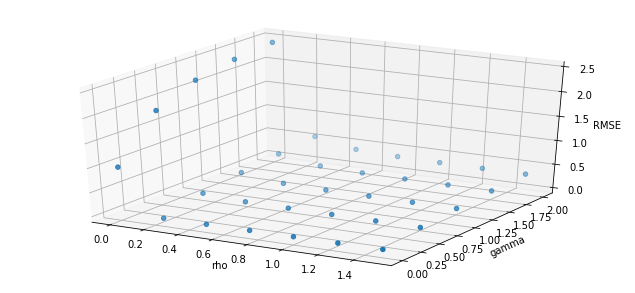

In [304]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rmse_results[:,0], rmse_results[:,1], rmse_results[:,2])
ax.set_xlabel('rho')
ax.set_ylabel('gamma')
ax.set_zlabel('RMSE')
plt.show()

### Exercise 2

- Repeat the above experiment using the sigmoid kernel and the cubic spline kernel
- Present your results with appropriate plots
- Determine the best model using the RMSE on test data

In [ ]:
# EXERCISE 2
# Your code goes here

## Identification of nonlinear dynamical systems

#### A few words about nonlinear systems

Consider a nonlinear discrete-time dynamical system of the form

$$
y(k) = F(y(k), \ldots, y(k-n), u(k), \ldots, u(k-m)),
$$

for $n,m\in\mathbb{N}$, typically with $n>m$ and $y(k)\in\mathbb{R}$, $u(k) \in \mathbb{R}$.

Therefore, $F$ is a mapping $F:\mathbb{R}^{n+m+2}\to\mathbb{R}$.

At time $k$ we may define the variable $x(k) = (y(k), \ldots, y(k-n), u(k), \ldots, u(k-m))$ which serves as the system state. 

Then, the system dynamics becomes

$$
y(k) = F(x(k)).
$$

Suppose we have gathered input-output data from the above system and we have packed them in the form of a dataset $\{(x(t), y(t))\}_{t=1}^{N}$.

Then problem $\mathbb{P}$ on this data defines exactly the system identification problem:

$$
\operatorname*{Minimize}_{f\in H} \sum_{i\in I} (y(t) - f(x(t)))^2 + \gamma \|f\|_H
$$


#### Example: logistic map population dynamics 

Consider the following nonlinear dynamical system

$$
\begin{align}
x(k+1) {}={}& F(x(k))\\
{}:={}& rx(k)(1-x(k)),
\end{align}
$$

with $r\in [0,4]$.

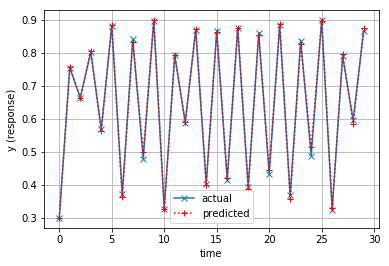

In [418]:
# generate input signal
n_data = 50
    
# produce output data
y_init = .6                        # initial condition
y_logistic = np.zeros(n_data)      # output data
y_logistic[0] = y_init

r_logistic = 3.6
for t in range(1, n_data):
    y_logistic[t] = r_logistic*y_logistic[t-1]*(1-y_logistic[t-1])

# Define the system state
x_training = np.zeros([n_data-1, 1])
y_training = np.zeros(n_data)

for i in range(0, n_data-1):
    x_training[i,:] = y_logistic[i]
    
y_training = y_logistic[1:]    

rho = 6
gamma = 1e-3
krnl = gaussian_kernel(rho)
trn = trainer(krnl, gamma)
f_star = trn.train(x_training, y_training)

y_init = .3
n_pred = 30
y_predicted = np.zeros(n_pred); y_actual = np.zeros(n_pred)
y_predicted[0] = y_init;y_actual[0] = y_init

for t in range(1,n_pred):
    y_predicted[t] = f_star.call(np.array([y_predicted[t-1]]))
    y_actual[t] = r_logistic*y_actual[t-1]*(1-y_actual[t-1])

plt.plot(range(0, n_pred), y_actual[:n_pred], marker='x')
plt.plot(range(0, n_pred), y_predicted,marker='+', color='r', markersize=6, linestyle=':')
plt.xlabel('time'); plt.ylabel('y (response)')
plt.grid()
plt.legend(['actual' , 'predicted'])
plt.show()